In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   #za grafove i vizuelizaciju
import matplotlib.pyplot as plt  #isto za plotovanje grafika ako zatreba, inline da bi u istom okviru plotovao jupyter
%matplotlib inline         
sns.set_theme(color_codes=True)

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)


Ucitavanje datoteke u dataframe:

In [2]:
csv_path = "../csv/DatasetF1.csv"

df = pd.read_csv(csv_path, index_col=0) 

/tmp/ipykernel_142198/2528572576.py:3: DtypeWarning: Columns (7,8,13,14,17,42,45,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, index_col=0)


In [3]:
  # index_col da ne bi dobili Unnamed kolonu 

#df['quali_date'] = df['quali_date'].str.replace('\\N', 'NaN') # posto je u nekim kolonama objekat sa vrednosti \N, ovo bi trebalo mozda primeniti

#df.replace(to_replace='\\N', value=None, regex=False)

#df.replace('\\N', 'NaN')

#df['time'] = df['time'].str.replace('\\N', 'NaN')

df.replace('\\N', None, inplace=True)    # menjamo svuda \N vrednost tipa object u None vrednost, da bi posle mogli da transformisemo po potrebi

df['quali_date'] = pd.to_datetime(df['quali_date'])

df['miliseconds_laptimes'] = pd.to_timedelta(df['milliseconds_laptimes'], 'milliseconds')

df.drop('positionText', axis=1)




,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name_x,date,time_races,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url_y,driverRef,number_drivers,code,forename,surname,dob,nationality,url,constructorRef,name,nationality_constructors,url_constructors,lap,position_laptimes,time_laptimes,milliseconds_laptimes,stop,lap_pitstops,time_pitstops,duration,milliseconds_pitstops,driverStandingsId,points_driverstandings,position_driverstandings,positionText_driverstandings,wins,constructorStandingsId,points_constructorstandings,position_constructorstandings,positionText_constructorstandings,wins_constructorstandings,status,miliseconds_laptimes
0,21232,860,18,1,3,2,1,1,25.0,58,1:34:09.565,5649565,56,1,1:29.187,214.053,1,2012,1,1,Australian Grand Prix,2012-03-18,06:00:00,http://en.wikipedia.org/wiki/2012_Australian_G...,None,None,None,None,None,None,NaT,None,None,None,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,1,1:39.264,99264,1,16,17:28:30,23.275,23275,64976,25.0,1,1,1,24932,40.0,1,1,1,Finished,0 days 00:01:39.264000
1,21232,860,18,1,3,2,1,1,25.0,58,1:34:09.565,5649565,56,1,1:29.187,214.053,1,2012,1,1,Australian Grand Prix,2012-03-18,06:00:00,http://en.wikipedia.org/wiki/2012_Australian_G...,None,None,None,None,None,None,NaT,None,None,None,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,1,1:39.264,99264,2,36,17:59:44,22.837,22837,64976,25.0,1,1,1,24932,40.0,1,1,1,Finished,0 days 00:01:39.264000
2,21232,860,18,1,3,2,1,1,25.0,58,1:34:09.565,5649565,56,1,1:29.187,214.053,1,2012,1,1,Australian Grand Prix,2012-03-18,06:00:00,http://en.wikipedia.org/wiki/2012_Australian_G...,None,None,None,None,None,None,NaT,None,None,None,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2,1,1:33.414,93414,1,16,17:28:30,23.275,23275,64976,25.0,1,1,1,24932,40.0,1,1,1,Finished,0 days 00:01:33.414000
3,21232,860,18,1,3,2,1,1,25.0,58,1:34:09.565,5649565,56,1,1:29.187,214.053,1,2012,1,1,Australian Grand Prix,2012-03-18,06:00:00,http://en.wikipedia.org/wiki/2012_Australian_G...,None,None,None,None,None,None,NaT,None,None,None,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2,1,1:33.414,93414,2,36,17:59:44,22.837,22837,64976,25.0,1,1,1,24932,40.0,1,1,1,Finished,0 days 00:01:33.414000
4,21232,860,18,1,3,2,1,1,25.0,58,1:34:09.565,5649565,56,1,1:29.187,214.053,1,2012,1,1,Australian Grand Prix,2012-03-18,06:00:00,http://en.wikipedia.org/wiki/2012_Australian_G...,None,None,None,None,None,None,NaT,None,None,None,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,3,1,1:33.350,93350,1,16,17:28:30,23.275,23275,64976,25.0,1,1,1,24932,40.0,1,1,1,Finished,0 days 00:01:33

Sample data:

In [4]:
df.sample(n=10, random_state=1)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name_x,date,time_races,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url_y,driverRef,number_drivers,code,forename,surname,dob,nationality,url,constructorRef,name,nationality_constructors,url_constructors,lap,position_laptimes,time_laptimes,milliseconds_laptimes,stop,lap_pitstops,time_pitstops,duration,milliseconds_pitstops,driverStandingsId,points_driverstandings,position_driverstandings,positionText_driverstandings,wins,constructorStandingsId,points_constructorstandings,position_constructorstandings,positionText_constructorstandings,wins_constructorstandings,status,miliseconds_laptimes
306778,22749,937,18,1,22,19,14,14,14,0.0,42,None,None,38,15,1:55.533,218.244,11,2015,11,13,Belgian Grand Prix,2015-08-23,12:00:00,http://en.wikipedia.org/wiki/2015_Belgian_Gran...,None,None,None,None,None,None,NaT,None,None,None,spa,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,12,17,2:12.927,132927,2,20,14:47:33,24.151,24151,67275,6.0,18,18,0,26257,17.0,9,9,0,+1 Lap,0 days 00:02:12.927000
403771,25356,1051,842,213,10,2,11,11,11,0.0,56,None,None,46,11,1:27.019,222.572,11,2021,20,78,Qatar Grand Prix,2021-11-21,14:00:00,http://en.wikipedia.org/wiki/2021_Qatar_Grand_...,2021-11-19,None,2021-11-19,None,2021-11-20,None,2021-11-20,None,None,None,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.45420,None,http://en.wikipedia.org/wiki/Losail_Internatio...,gasly,10,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,32,6,1:28.740,88740,1,13,17:23:37,25.630,25630,70714,92.0,9,9,0,27907,112.0,6,6,0,+1 Lap,0 days 00:01:28.740000
201322,22602,929,154,208,8,10,7,7,7,6.0,57,+1:24.763,5790572,34,15,1:39.161,196.48,1,2015,4,3,Bahrain Grand Prix,2015-04-19,15:00:00,http://en.wikipedia.org/wiki/2015_Bahrain_Gran...,None,None,None,None,None,None,NaT,None,None,None,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...,grosjean,8,GRO,Romain,Grosjean,1986-04-17,French,http://en.wikipedia.org/wiki/Romain_Grosjean,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1,39,8,1:39.871,99871,1,12,18:24:12,24.735,24735,67113,12.0,9,9,0,26177,12.0,6,6,0,Finished,0 days 00:01:39.871000
354539,22339,909,813,208,13,18,12,12,12,0.0,66,None,None,41,15,1:22.305,200.065,11,2014,10,10,German Grand Prix,2014-07-20,12:00:00,http://en.wikipedia.org/wiki/2014_German_Grand...,None,None,None,None,None,None,NaT,None,None,None,hockenheimring,Hockenheimring,Hockenheim,Germany,49.3278,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring,maldonado,13,MAL,Pastor,Maldonado,1985-03-09,Venezuelan,http://en.wikipedia.org/wiki/Pastor_Maldonado,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1,41,13,1:22.305,82305,1,18,14:29:48,19.099,19099,66826,0.0,19,19,0,26038,8.0,8,8,0,+1 Lap,0 days 00:01:22.305000
213814,22425,913,807,10,27,13,9,9,9,2.0,60,+1:01.661,7266456,27,10,1:52.762,161.703,1,2014,14,15,Singapore Grand Prix,2014-09-21,12:00:00,http://en.wikipedia.org/wiki/2014_Singapore_Gr...,None,None,None,None,None,None,NaT,None,None,None,marina_bay,Marina Bay Street Circuit,Marina Bay,Singapore,1.2914,103.86400,18,http://en.wikipedia.org/wiki/Marina_Bay_Street...,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...,40,12,1:55.184,115184,3,31,21:05:18,30.415,3

In [5]:

# data.columns = data.columns.str.lower().str.replace(' ', '_')     # da standarzujem imena kolona

df.dtypes

resultId                                       int64
raceId                                         int64
driverId                                       int64
constructorId                                  int64
number                                         int64
grid                                           int64
position                                      object
positionText                                  object
positionOrder                                  int64
points                                       float64
laps                                           int64
time                                          object
milliseconds                                  object
fastestLap                                    object
rank                                           int64
fastestLapTime                                object
fastestLapSpeed                               object
statusId                                       int64
year                                          

In [48]:
df.shape 

earlist_race = df['year'].min()

print('The earlist race in the dataset is from year: ') 
print(earlist_race)

The earlist race in the dataset is from year: 
2012


DRIVER ID IMA DUPLIKATA!

In [49]:
boolean = df['driverId'].duplicated().any()

print(boolean)

True


In [50]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)        # proveravamo da li su neki redovi duplikati



Number of duplicate rows:  (0, 76)


Nema duplih redova u datasetu.

In [51]:
# df.count()

print(df['sprint_time'].isnull().any())   #proverimo da li imamo NULL vrednosti negde

True


In [52]:
#df = df.rename(columns={"lap": "number_laps", "stop": "number_pit_stops"})

#df = df.rename(columns={"name": "team", "name_x": "race_name", "name_y": "circuit_name"})

#df = df.rename(columns={"dob": "birthdate"})

In [53]:
#print(df[['positionText_constructorstandings', 'position_constructorstandings']].head(5)) 

#print(df[['race_name', 'race_name_alt', 'team']].sample(n=10, random_state=1))

#print(df[['race_name', 'forename', 'surname', 'position_driverstandings', 'points_driverstandings', 'date', 'wins', 'laps']].head(10))
#df['fastestLapTime'] = df['fastestLapTime'].apply(pd.to_numeric)

print(df[['fp1_time', 'time', 'time_pitstops', 'fastestLapTime', 'lap_pitstops', 'wins_constructorstandings']].sample(n=10, random_state=1))   # uzmemo random redove radi pregleda dataframa

        fp1_time         time time_pitstops fastestLapTime  lap_pitstops  \
306778      None         None      14:47:33       1:55.533            20   
403771      None         None      17:23:37       1:27.019            13   
201322      None    +1:24.763      18:24:12       1:39.161            12   
354539      None         None      14:29:48       1:22.305            18   
213814      None    +1:01.661      21:05:18       1:52.762            31   
199882      None    +1:07.988      16:32:33       1:27.679            58   
140544      None  1:27:38.107      14:40:21       1:08.411            29   
498000  12:00:00         None      15:17:07       1:39.265             8   
278482      None      +46.536      21:01:38       1:47.055            24   
313130      None         None      14:12:08       1:13.761             6   

        wins_constructorstandings  
306778                          0  
403771                          0  
201322                          0  
354539             

Ovde proveravam da li su u nekim kolonama jednake vrednosti, posto neke sa istim vrednostima imaju vrednost na mestima gde neke imaju 'None'.

In [54]:
positionOrder_null = df['positionOrder'].isnull().values.any()

position_null = df['position'].isnull().values.any()

positionText_null = df['positionText'].isnull().values.any()


print ('Column positionOrder has nulls: ', positionOrder_null)

print ('Column position has nulls: ', position_null)

print ('Column positionText has nulls: ', positionText_null)




Column positionOrder has nulls:  False
Column position has nulls:  True
Column positionText has nulls:  False


In [55]:
mask = (df['positionOrder'] != df['position']) & (df['position'].notna().all())
print(mask)

0         False
1         False
2         False
3         False
4         False
          ...  
518412    False
518413    False
518414    False
518415    False
518416    False
Length: 518417, dtype: bool


Text(0.5, 0, 'name')

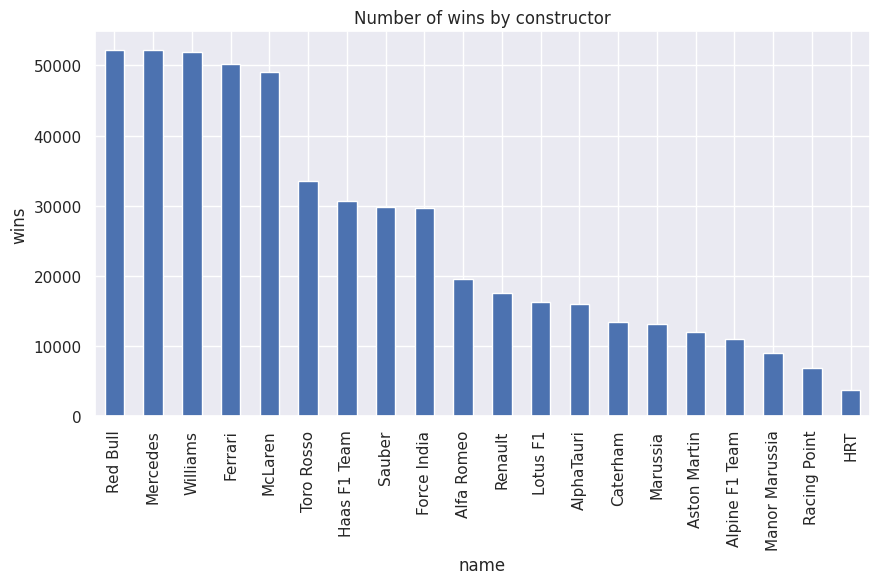

In [56]:
df.name.value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title("Number of wins by constructor")
plt.ylabel('wins')
plt.xlabel('name')

Proverimo da li ove dve kolone imaju potpuno iste vrednosti (samo su različitog naziva)

In [57]:
# df['positionText_constructorstandings'].equals(df['position_constructorstandings'])  

print(df['circuitId'].unique())

print(df['name_x'].unique())

[ 1  2 17  3  4  6  7 12  9 10 11 13 14 15 22 68 24 69 18 20 35 70 71 32
 73 21 75 34  5 77 79 39 76 78]
['Australian Grand Prix' 'Malaysian Grand Prix' 'Chinese Grand Prix'
 'Bahrain Grand Prix' 'Spanish Grand Prix' 'Monaco Grand Prix'
 'Canadian Grand Prix' 'European Grand Prix' 'British Grand Prix'
 'German Grand Prix' 'Hungarian Grand Prix' 'Belgian Grand Prix'
 'Italian Grand Prix' 'Singapore Grand Prix' 'Japanese Grand Prix'
 'Indian Grand Prix' 'Abu Dhabi Grand Prix' 'United States Grand Prix'
 'Brazilian Grand Prix' 'Korean Grand Prix' 'Austrian Grand Prix'
 'Russian Grand Prix' 'Mexican Grand Prix' 'Azerbaijan Grand Prix'
 'Emilia Romagna Grand Prix' 'Portuguese Grand Prix' 'French Grand Prix'
 'Turkish Grand Prix' 'Saudi Arabian Grand Prix' 'Miami Grand Prix'
 'Dutch Grand Prix' 'Styrian Grand Prix' '70th Anniversary Grand Prix'
 'Eifel Grand Prix' 'Sakhir Grand Prix' 'Tuscan Grand Prix'
 'Mexico City Grand Prix' 'São Paulo Grand Prix' 'Qatar Grand Prix']


In [58]:
drop_columns = []

#drop_columns.append('positionText_constructorstandings')
#drop_columns.append('positionText_driverstandings')

#df.drop(columns = drop_columns, inplace=True)




#df.drop('positionText_constructorstandings', axis=1, inplace=True)   #obrisemo ovu kolonu jer se svakako poklapa sa kolonom iznad

#df.drop('positionText_driverstandings', axis=1, inplace=True)        #axis 1 je kolona, axis 0 je indeks

In [59]:
df['position'].equals(df['positionText'])
  

False

Cuvanje u novi csv fajl: 

In [60]:
# df.to_csv("../csv/DatasetF1_clean.csv")
